In [1]:
import os 
import sys
sys.path.append("/mnt/code")
from cellsystem import CellSystem
from parameters_df import *
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import special
from cellmodel import CellModel

In [2]:
all_parameters=[]
n_scans=24
for i in range(n_scans):
    all_parameters.append(Parameters())



In [3]:
#taken from /mnt/main.py controlling the scan:
#running  simulations with:
#0: default
#1: K_RL=1000
#2: K_RL=0.1
#3: K_GRL=10
#4: K_GRL=0.01
#5: decay=1.925e-3
#6: decay=1.925e-7
#7: clearance=1.925e-2
#8: clearance=1.925e-6

In [4]:

all_parameters[1].set("K_RL",1000)
all_parameters[2].set("K_RL",0.1)
all_parameters[3].set("K_GRL",10)
all_parameters[4].set("K_GRL",0.01)
all_parameters[5].set("decay",1.925e-3)
all_parameters[6].set("decay",1.925e-7)
all_parameters[7].set("clearance_rate",1.925e-2)
all_parameters[8].set("clearance_rate",1.925e-6)

# time indices =315
doing ti=0
doing ti=100
doing ti=200
doing ti=300
K_RL=10.0
K_GRL=0.1
decay=1.925408834888737e-05
clearance=0.0001925408834888737
length of simulation region in micron is 600


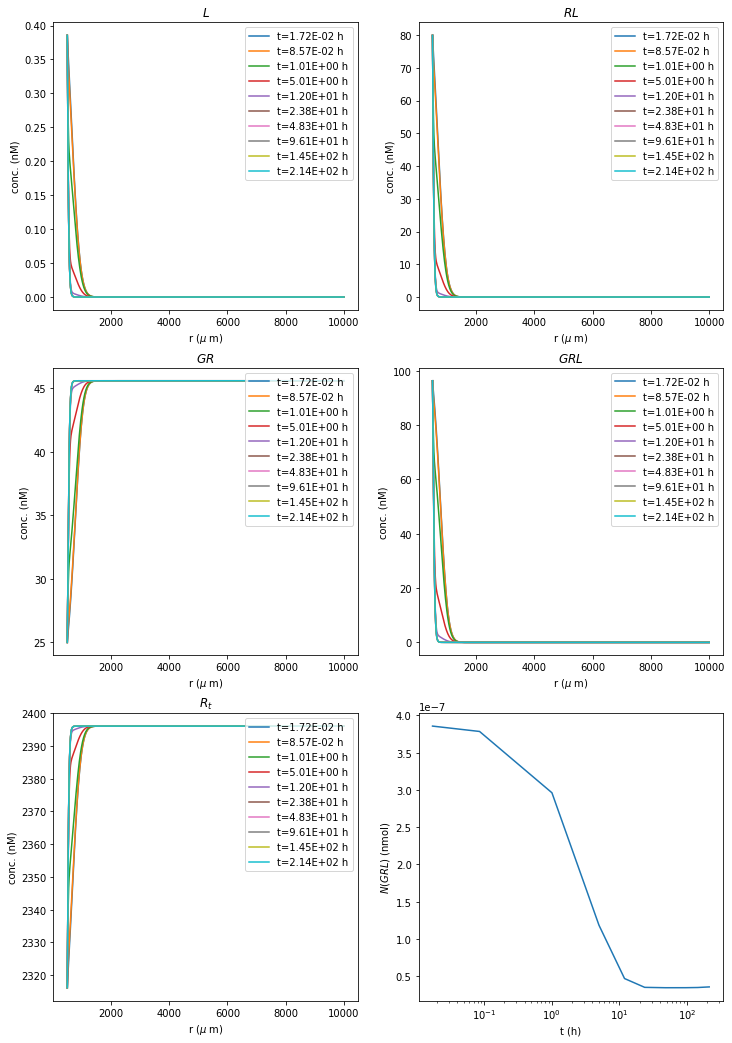

In [5]:
# increased decay, whoops i increased all the decay, so whole model is lower

increaseddecay=CellSystem(all_parameters[0])
increaseddecay.read_file("/mnt/Results/increaseddecay.txt")
indices=increaseddecay.find_indices(np.array([1/60,5/60,1,5,12,24,24*2,24*4,24*6]))
print("K_RL={}".format(increaseddecay.P.get("K_RL")))
print("K_GRL={}".format(increaseddecay.P.get("K_GRL")))
print("decay={}".format(increaseddecay.P.get("decay")))
print("clearance={}".format(increaseddecay.P.get("clearance_rate")))
increaseddecay.plot(indices=indices)

In [12]:
tester=CellSystem(all_parameters[0])

In [13]:
tester.read_file("/mnt/Results/fulldecay.txt")
# full decay looks like the other models about half a day in
# looks like the loss of receptor + internelisation has a bigger effect than expected
# gonna test with different lengths of diffusions runs soon. should run 12-24 hours of model after
# for assurance.

# time indices =417
doing ti=0
doing ti=100
doing ti=200
doing ti=300
doing ti=400


K_RL=10.0
K_GRL=0.1
decay=1.925408834888737e-05
clearance=0.0001925408834888737
length of simulation region in micron is 600


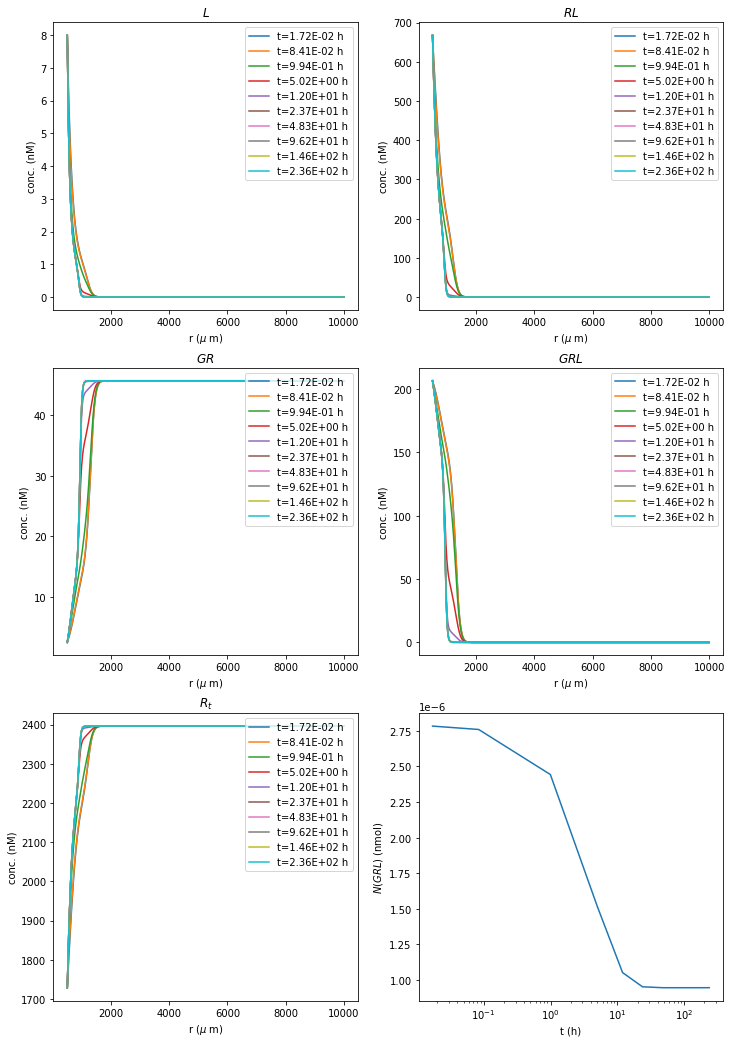

In [6]:
indices=tester.find_indices(np.array([1/60,5/60,1,5,12,24,24*2,24*4,24*6]))
print("K_RL={}".format(tester.P.get("K_RL")))
print("K_GRL={}".format(tester.P.get("K_GRL")))
print("decay={}".format(tester.P.get("decay")))
print("clearance={}".format(tester.P.get("clearance_rate")))
tester.plot(indices=indices)


In [3]:
# with full init decay
def diffusion2(x,d,t,c0,x0,loss):
    return(c0*np.exp(-loss*t)*(1-special.erf((x-x0)/(np.sqrt(4*d*t)))))
r=np.arange(start=0,stop= 10.0E+6,step=10.0E+6/600).reshape(600,1)
t=np.arange(start=3600,stop=60*60*24*10,step=3600)
rundf=np.array(r).reshape(600,1)*0
for i in t:

    rundf=np.append(rundf,(diffusion2(r,10*1E6,i,100,0,0)),axis=1)
# the loss function should not be multiplied on, but maybe in the error function.

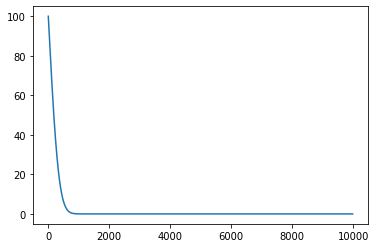

In [5]:
#.0014440566261665528
rundf.shape
plt.plot(r/1000,rundf[:,1])


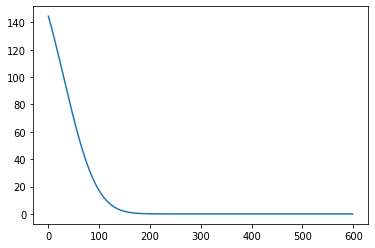

In [5]:
# with reduced init decay
def diffusion2(x,d,t,c0,x0,loss):
    return(c0*np.exp(-loss*0)*(1-special.erf((x-x0)/(np.sqrt(4*d*t)))))
r=np.arange(start=0,stop= 10.0E+6,step=10.0E+6/600).reshape(600,1)
t=np.arange(start=3600,stop=60*60*24*10,step=3600)
rundf=np.array(r).reshape(600,1)*0
for i in t:

    rundf=np.append(rundf,(diffusion2(r,10*1E6,i,100,0.5E+6,np.log(2)/(10*3600))),axis=1)
plt.plot(rundf[:,10])

In [9]:
CellSystems=[]
CellSystems.append(CellSystem(all_parameters[0]))
CellSystems[-1].read_file("Results/t_Lall0.txt")


# time indices =451
doing ti=0
doing ti=100
doing ti=200
doing ti=300
doing ti=400


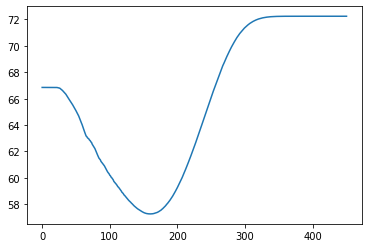

In [127]:
#plt.plot(CellSystems[0].L[450,:])
plt.plot(np.sum(CellSystems[0].L,axis=1))
# at no time do we reach half the initial combined l conc


In [26]:
#plt.plot(CellSystems[0].L[450,:])
#CellSystems[0].L[450,:]
# roughly at point 5-6 do we reach half of conc at 0 point, aka
def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.xticks(np.arange(0, 600, step=100),np.arange(0, 10001, step=2000))
    plt.xlabel("μm")
    plt.ylabel("Time(AU)")
    plt.title("Heatmap of GRL spread")
    plt.show()

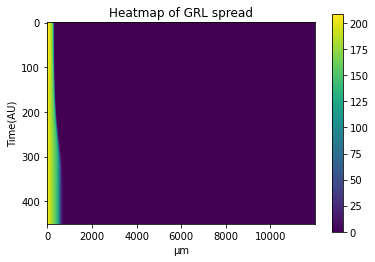

In [27]:

heatmap2d(CellSystems[0].GRL[:,:])

# how to put names on plots?
#CellSystems[0].T

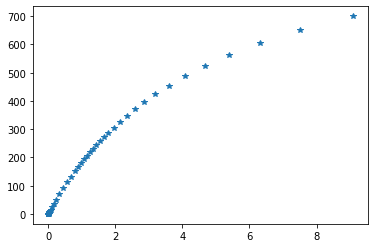

In [103]:
#plt.plot(np.log(tester.L[-1,0:100]))
# update decay by adding a linear connection between L and RL with L 0:4 ( assumed linear) times internerlisering
#[Rl]loss, dependant on L, linear between 0:4
#[rl]=alpha*[l] ( its linearish between 0:4)
# beta= given internalisation, 
# extra loss= beta*alpa* b/2*r


plt.plot(CellSystems[0].L[450,0:100],CellSystems[0].RL[450,0:100],"*")


# look at plot/ result, find what at what x, c=c0/2
# if going from the diffusions calc, do f(x,t)=c0/2, isolate x to have x as function of t.

In [22]:
indices=[]
for i in range(100):
    if CellSystems[0].L[450,i]<=4:
        indices.append(i)
#plt.plot(CellSystems[0].L[450,indices],CellSystems[0].RL[450,indices],"*")
xcalc=CellSystems[0].L[450,indices].reshape((-1,1))
ycalc=CellSystems[0].RL[450,indices]
model=LinearRegression(fit_intercept=False).fit(xcalc,ycalc)

model.coef_
newdecay=int(model.coef_)* (np.log(2)/(1*3600))*(2*10/(100))
# assuming clearance rate is the right value. b=10,r=r_tube?
# with this change the first day.5 of simulation take not even 10 minutes, and slows down after that.

In [23]:
newdecay

0.0056992101512706615

In [ ]:
np.log(2)/(10*3600)

In [53]:
newdecay=0
newdecay=int(model.coef_)* (np.log(2)/(1*3600))*(10/(2*100))
newdecay+=np.log(2)/(10*3600)
newdecay

0.0014440566261665528

In [4]:
#CellSystems=[]
#for i in range(0,n_scans):
#    CellSystems.append(CellSystem(all_parameters[i]))
#    filename=all_parameters[i].get("filename")
#    print("Reading file {0}".format(filename))
#    CellSystems[-1].read_file(filename)

Reading file /mnt/Results/t_Lall0.txt
# time indices =451
doing ti=0
doing ti=100
doing ti=200
doing ti=300
doing ti=400
Reading file /mnt/Results/t_Lall1.txt
# time indices =412
doing ti=0
doing ti=100
doing ti=200
doing ti=300
doing ti=400
Reading file /mnt/Results/t_Lall2.txt
# time indices =410
doing ti=0
doing ti=100
doing ti=200
doing ti=300
doing ti=400
Reading file /mnt/Results/t_Lall3.txt
# time indices =373
doing ti=0
doing ti=100
doing ti=200
doing ti=300
Reading file /mnt/Results/t_Lall4.txt
# time indices =449
doing ti=0
doing ti=100
doing ti=200
doing ti=300
doing ti=400
Reading file /mnt/Results/t_Lall5.txt
# time indices =459
doing ti=0
doing ti=100
doing ti=200
doing ti=300
doing ti=400
Reading file /mnt/Results/t_Lall6.txt
# time indices =451
doing ti=0
doing ti=100
doing ti=200
doing ti=300
doing ti=400
Reading file /mnt/Results/t_Lall7.txt
# time indices =398
doing ti=0
doing ti=100
doing ti=200
doing ti=300
Reading file /mnt/Results/t_Lall8.txt
# time indices =420


In [5]:
myparam=Parameters()
cs0=CellSystems[0]
indices=cs0.find_indices(np.array([1/60,5/60,1,5,12,24,24*2,24*4,24*6]))

K_RL=10.0
K_GRL=0.1
decay=1.925408834888737e-05
clearance=0.0001925408834888737
length of simulation region in micron is 600


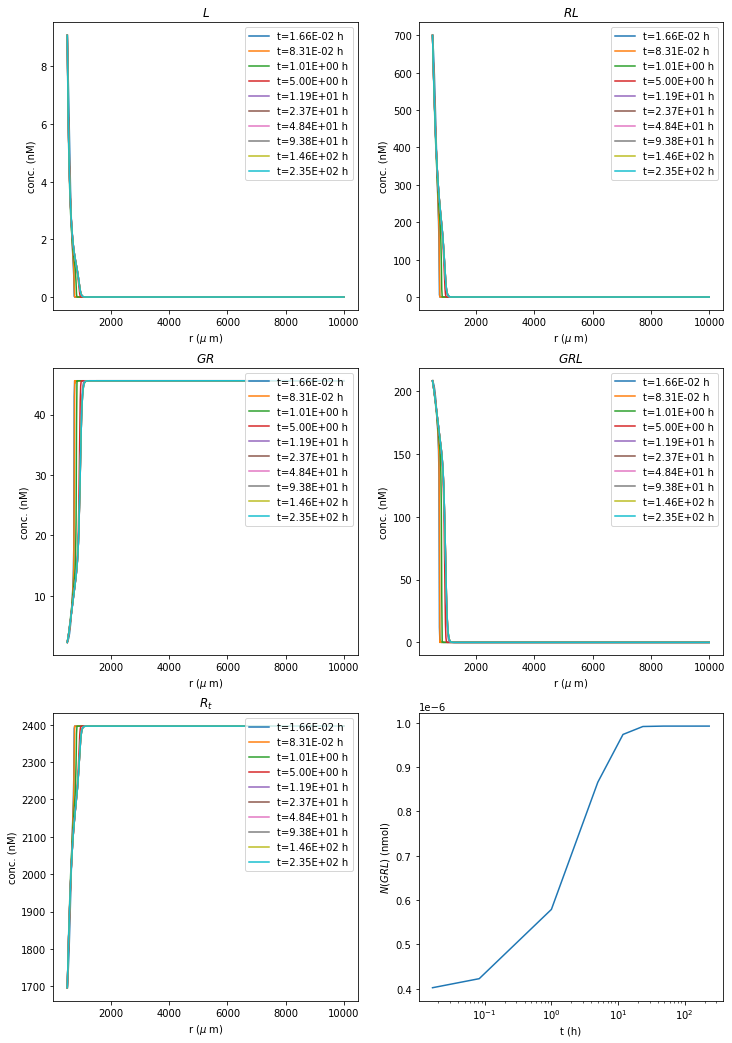

K_RL=1000.0
K_GRL=0.1
decay=1.925408834888737e-05
clearance=0.0001925408834888737
length of simulation region in micron is 600


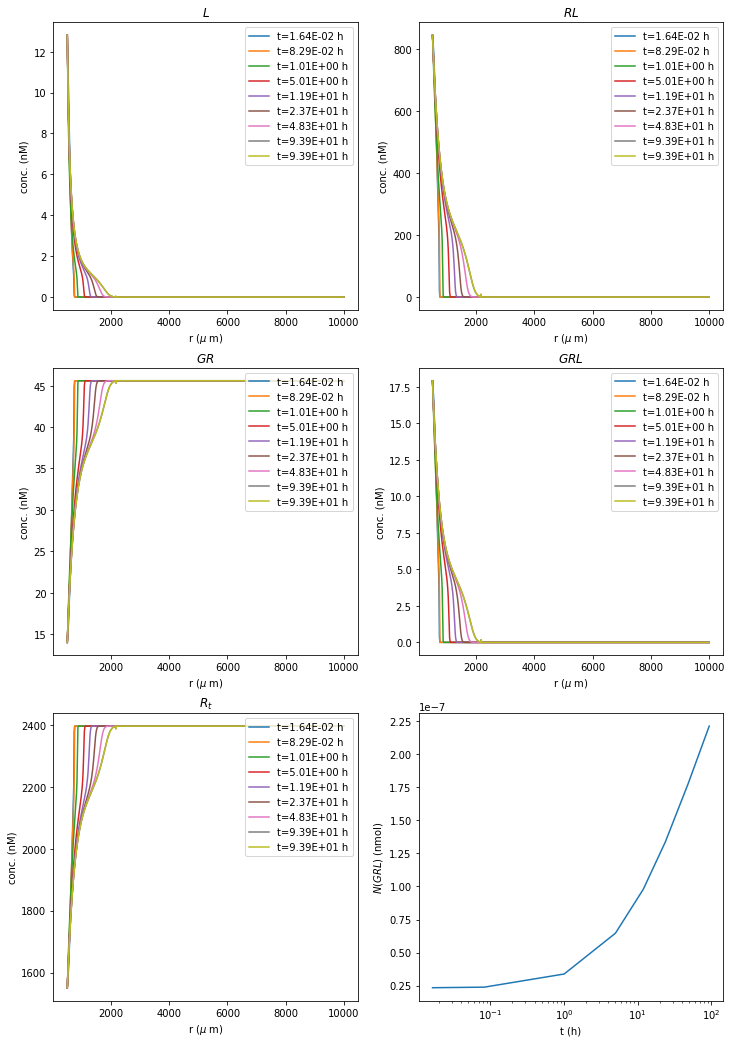

K_RL=0.1
K_GRL=0.1
decay=1.925408834888737e-05
clearance=0.0001925408834888737
length of simulation region in micron is 600


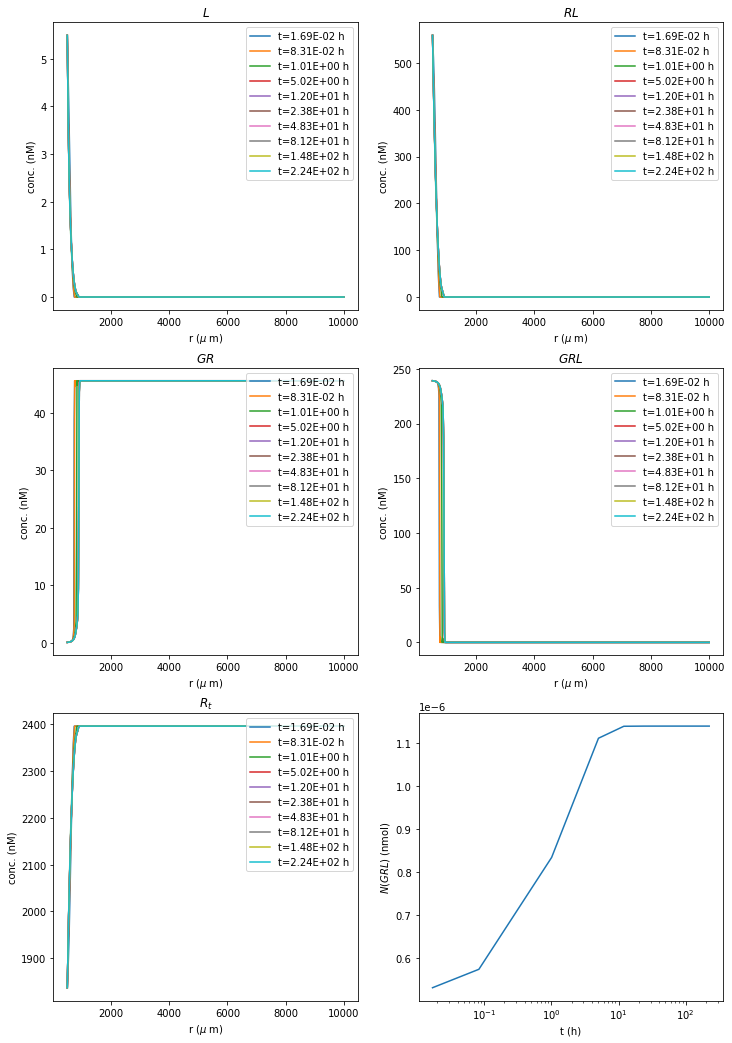

K_RL=10.0
K_GRL=10.0
decay=1.925408834888737e-05
clearance=0.0001925408834888737
length of simulation region in micron is 600


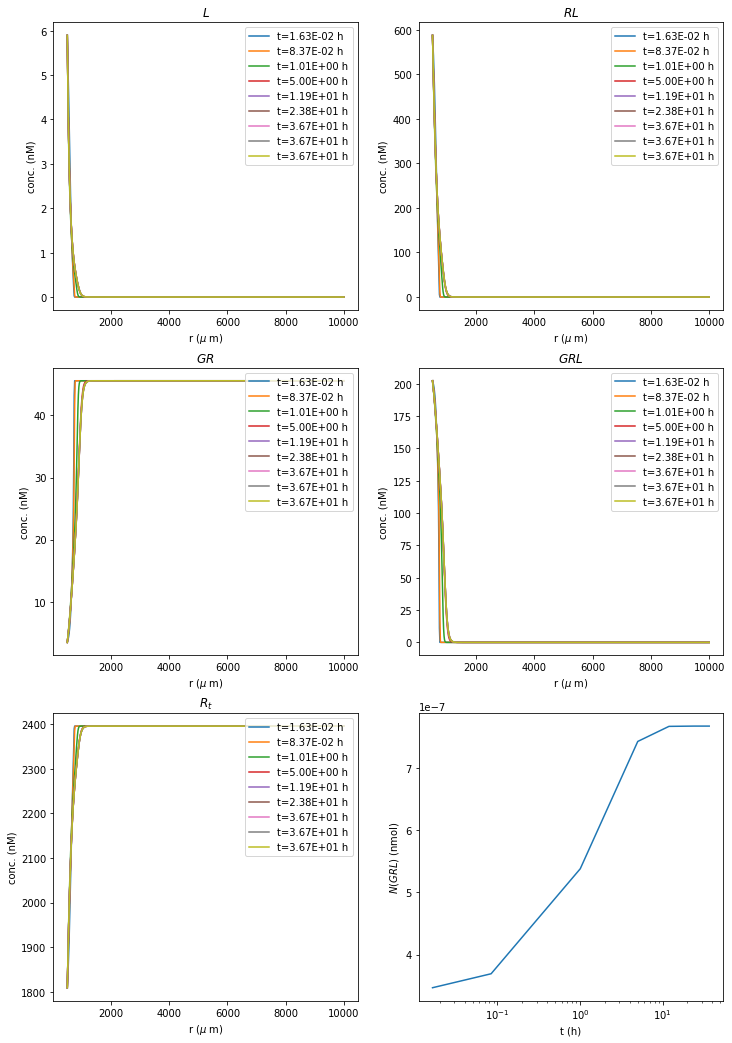

K_RL=10.0
K_GRL=0.01
decay=1.925408834888737e-05
clearance=0.0001925408834888737
length of simulation region in micron is 600


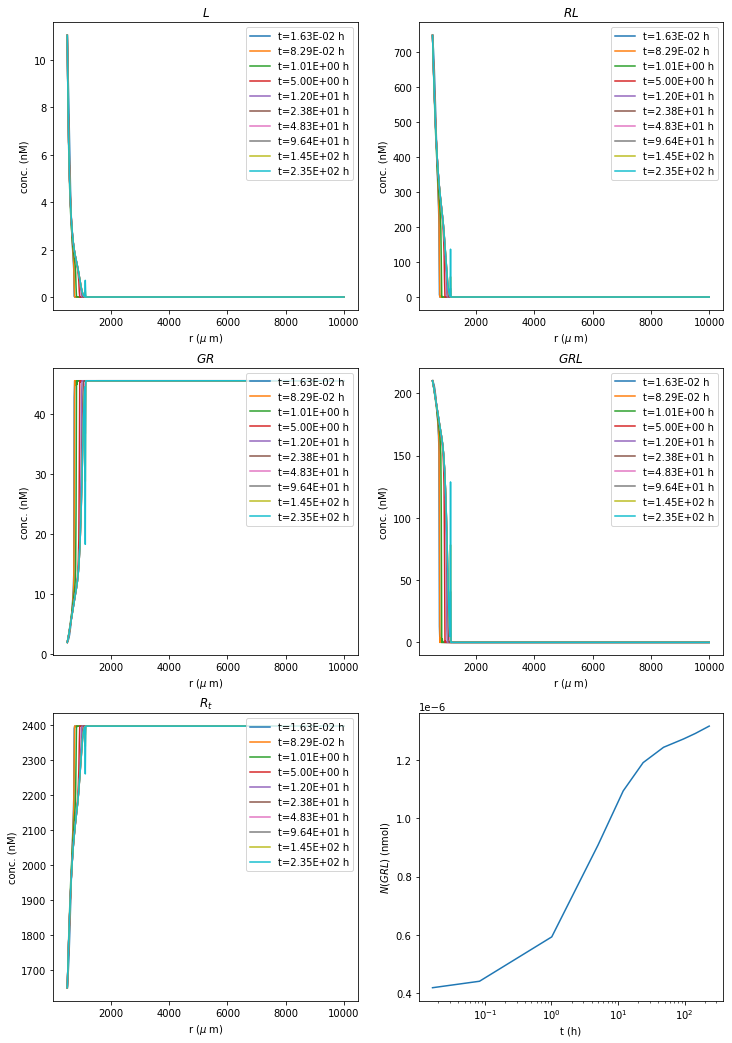

K_RL=10.0
K_GRL=0.1
decay=0.001925
clearance=0.0001925408834888737
length of simulation region in micron is 600


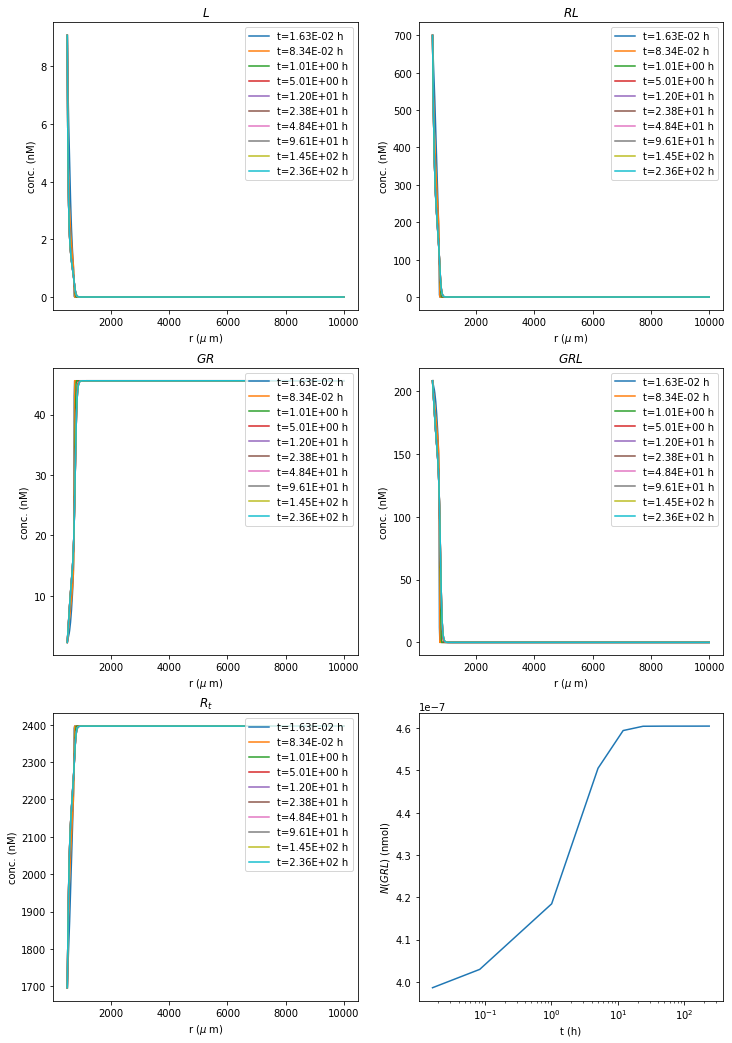

K_RL=10.0
K_GRL=0.1
decay=1.925e-07
clearance=0.0001925408834888737
length of simulation region in micron is 600


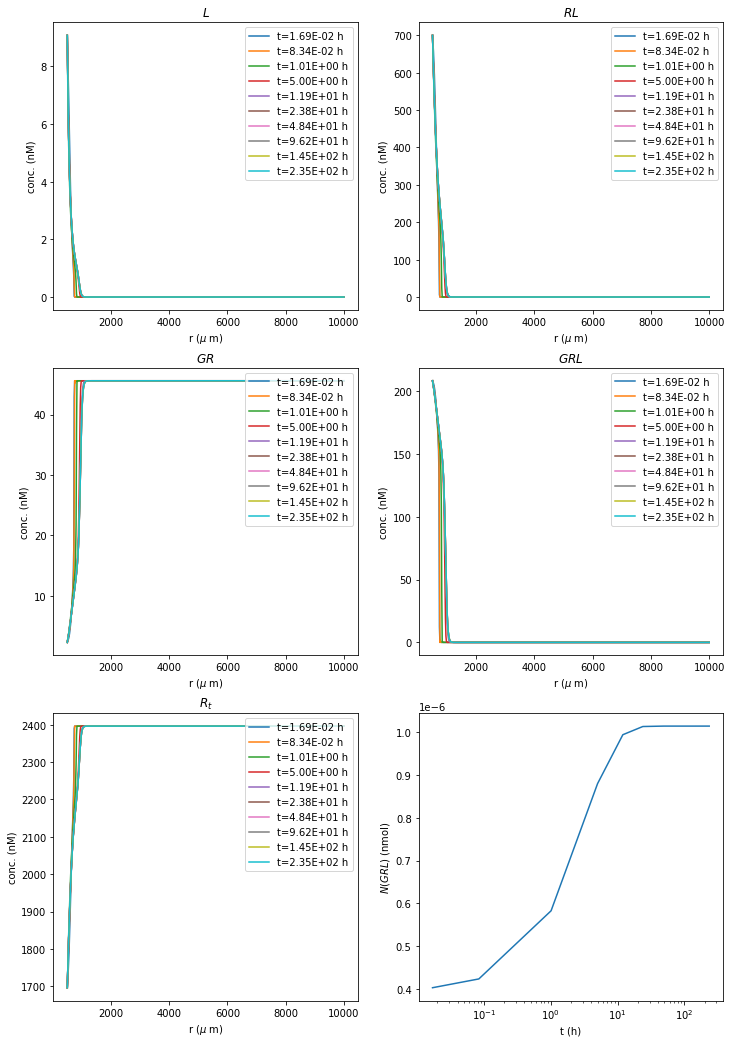

K_RL=10.0
K_GRL=0.1
decay=1.925408834888737e-05
clearance=0.01925
length of simulation region in micron is 600


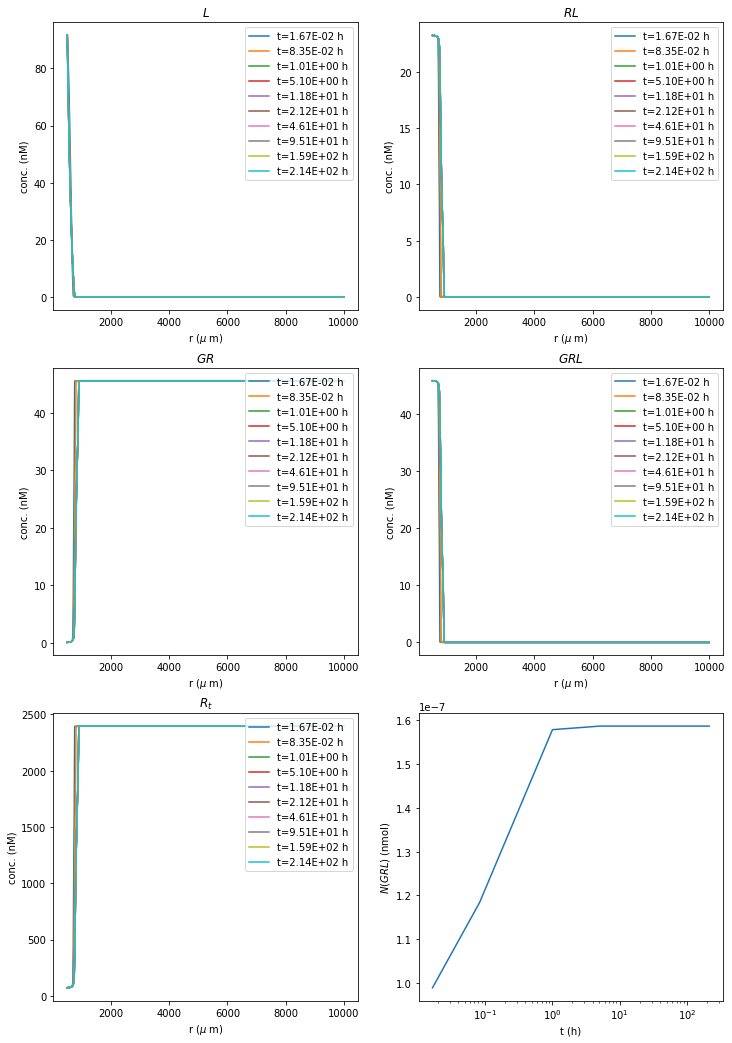

K_RL=10.0
K_GRL=0.1
decay=1.925408834888737e-05
clearance=1.925e-06
length of simulation region in micron is 600


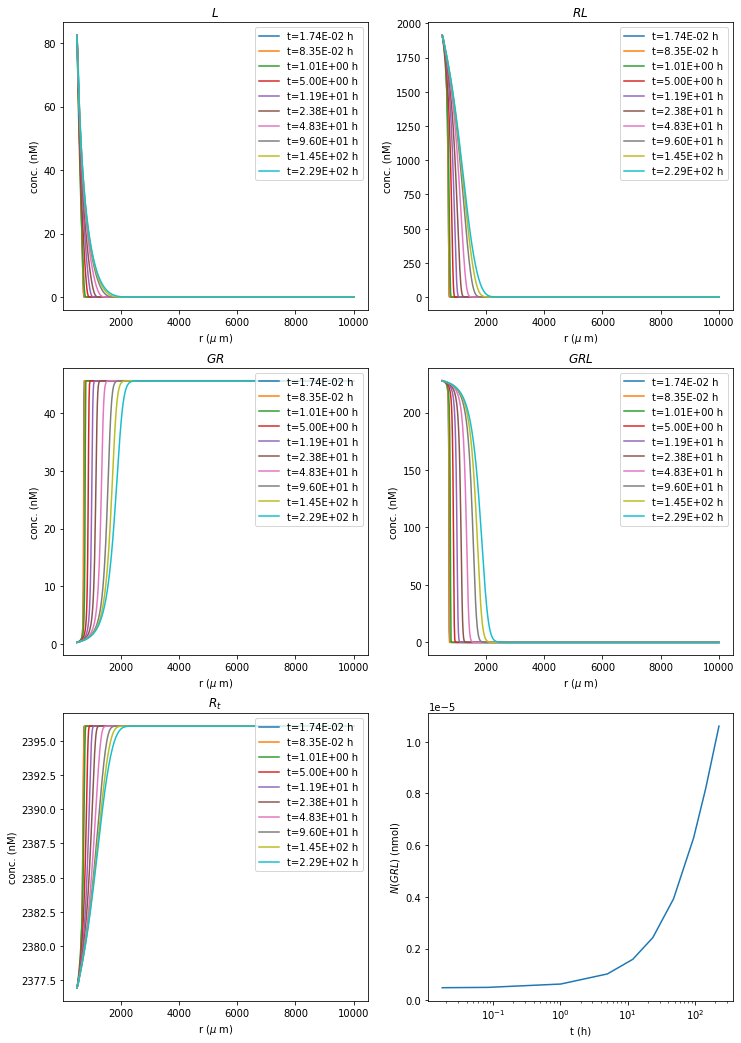

K_RL=10.0
K_GRL=0.1
decay=1.925408834888737e-05
clearance=0.0001925408834888737
length of simulation region in micron is 600


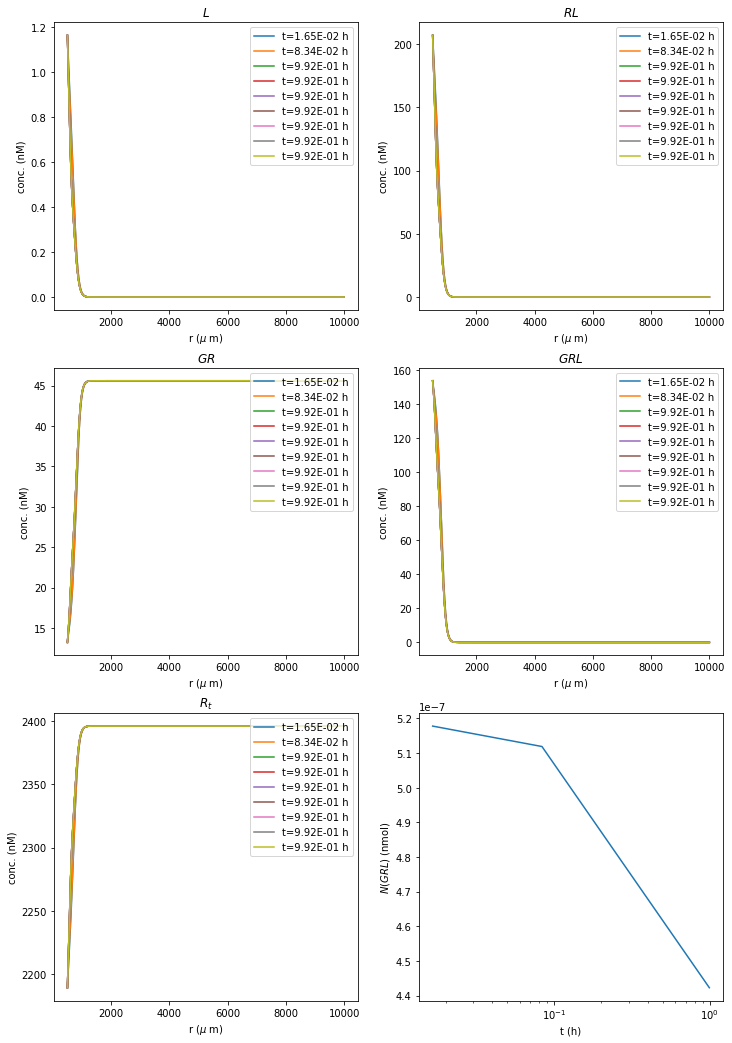

In [6]:
for i in range(0,n_scans):
    cs=CellSystems[i]
    indices=cs.find_indices(np.array([1/60,5/60,1,5,12,24,24*2,24*4,24*6]))
    print("K_RL={}".format(cs.P.get("K_RL")))
    print("K_GRL={}".format(cs.P.get("K_GRL")))
    print("decay={}".format(cs.P.get("decay")))
    print("clearance={}".format(cs.P.get("clearance_rate")))
    print("recycling={}".format(cs.P.get("recycling_rate")))
    cs.plot(indices=indices)

In [15]:
all_results=pd.DataFrame()
for i in range(0,n_scans):
    a_dict={}
    for k in {'K_RL','K_GRL','decay','clearance_rate'}:
        a_dict[k]=all_parameters[i].get(k)
    a_dict['N_GRL']=CellSystems[i].integrated_GRL[-1]
    all_results=all_results.append(a_dict,ignore_index=True)

In [16]:
all_results
#1 longer
#combine 1 & 6 to saturation


,K_RL,clearance_rate,K_GRL,decay,N_GRL
0,10.0,0.000193,0.1,0.000019,9.925900e-07
1,10.0,0.000193,0.1,0.000019,5.555548e-06
2,10.0,0.000193,0.1,0.000019,7.097326e-07
3,10.0,0.000193,0.1,0.000019,7.674935e-07
4,10.0,0.000193,0.1,0.000019,1.316012e-06
5,10.0,0.000193,0.1,0.000019,4.604635e-07
6,10.0,0.000193,0.1,0.000019,1.014408e-06
7,10.0,0.000193,0.1,0.000019,3.133091e-07
8,10.0,0.000193,0.1,0.000019,1.057994e-05
9,10.0,0.000193,0.1,0.000019,1.105647e-05


K_RL=10.0
K_GRL=0.1
decay=1.925408834888737e-05
clearance=0.0001925408834888737
length of simulation region in micron is 600


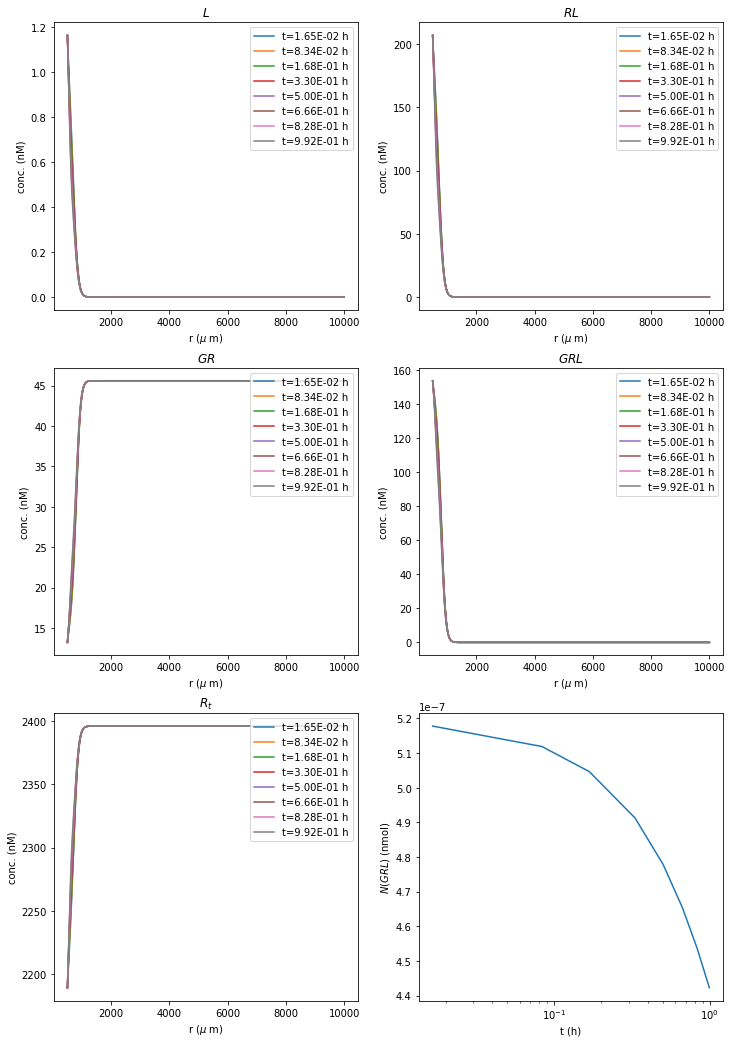

In [10]:
tester=CellSystems[9]
indices=tester.find_indices(np.array([1/60,5/60,10/60,20/60,30/60,40/60,50/60,1]))
print("K_RL={}".format(tester.P.get("K_RL")))
print("K_GRL={}".format(tester.P.get("K_GRL")))
print("decay={}".format(tester.P.get("decay")))
print("clearance={}".format(tester.P.get("clearance_rate")))
tester.plot(indices=indices)

In [5]:
tester.r

array([  500000.        ,   515859.76627713,   531719.53255426,
         547579.29883139,   563439.06510851,   579298.83138564,
         595158.59766277,   611018.3639399 ,   626878.13021703,
         642737.89649416,   658597.66277129,   674457.42904841,
         690317.19532554,   706176.96160267,   722036.7278798 ,
         737896.49415693,   753756.26043406,   769616.02671119,
         785475.79298831,   801335.55926544,   817195.32554257,
         833055.0918197 ,   848914.85809683,   864774.62437396,
         880634.39065109,   896494.15692821,   912353.92320534,
         928213.68948247,   944073.4557596 ,   959933.22203673,
         975792.98831386,   991652.75459098,  1007512.52086811,
        1023372.28714524,  1039232.05342237,  1055091.8196995 ,
        1070951.58597663,  1086811.35225376,  1102671.11853088,
        1118530.88480801,  1134390.65108514,  1150250.41736227,
        1166110.1836394 ,  1181969.94991653,  1197829.71619366,
        1213689.48247078,  1229549.24874

1.0

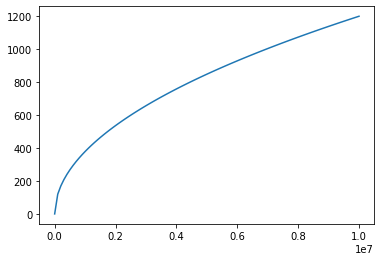